In [1]:
import os
from pathlib import Path
import zipfile, kaggle

In [2]:
path = Path('titanic')
if not path.exists(): #downloading from kaggle api
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [3]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [4]:
df = pd.read_csv(path/'train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.isna().sum() 
# We note lots of missing values for age and cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

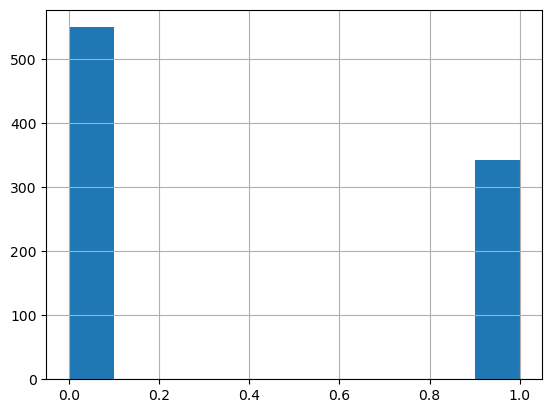

In [6]:
df["Survived"].hist()

In [7]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [8]:
df.fillna(modes, inplace=True) #Filling in missing values with the mode

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

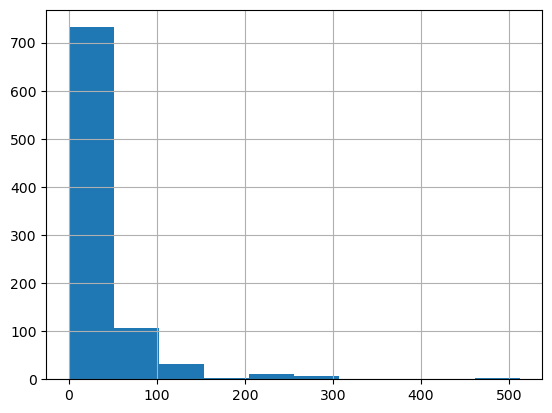

In [10]:
df['Fare'].hist()

In [11]:
#transform hist to prevent long postive skew from affecting results
df['Logfare'] = np.log(df['Fare'] + 1) #prevents 0 values 

<Axes: >

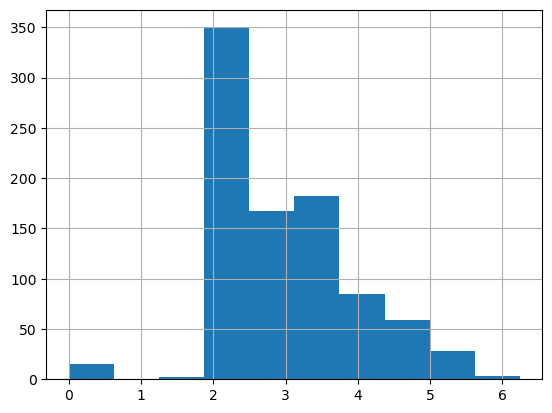

In [12]:
df['Logfare'].hist()

In [13]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
df.describe(include = [object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [15]:
df = pd.get_dummies(df, columns = ['Sex', 'Pclass', 'Embarked'], dtype = 'float')
df.columns
#one - hot encoding

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Logfare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Logfare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [17]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head(10)

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
from torch import tensor
t_dep = tensor(df.Survived)

In [19]:
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 

In [20]:
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
indep_cols = ['Age', 'SibSp', 'Parch', 'Logfare'] + added_cols
t_indep = tensor(df[indep_cols].values, dtype = torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [22]:
t_indep.size()

torch.Size([891, 12])

In [23]:
len(t_indep.shape) # Matrix is rank 2 tensor

2

# Linear Model

In [24]:
#Creating random coefficients, 1 coefficient for 1 column. Don't need a constant?
#Re-seed 
torch.manual_seed(17)

n_coeff = t_indep.shape[1]
coeffs = (torch.rand(n_coeff) - 0.5) # Centered around 0
coeffs

tensor([-0.0658,  0.0351,  0.3302, -0.3761, -0.4707,  0.0494, -0.1175,  0.0463, -0.0317, -0.4828, -0.4786, -0.1336])

In [25]:
t_indep * coeffs 

tensor([[-1.4467,  0.0351,  0.0000, -0.7937, -0.4707,  0.0000, -0.0000,  0.0000, -0.0317, -0.0000, -0.0000, -0.1336],
        [-2.4988,  0.0351,  0.0000, -1.6101, -0.0000,  0.0494, -0.1175,  0.0000, -0.0000, -0.4828, -0.0000, -0.0000],
        [-1.7097,  0.0000,  0.0000, -0.8233, -0.0000,  0.0494, -0.0000,  0.0000, -0.0317, -0.0000, -0.0000, -0.1336],
        [-2.3016,  0.0351,  0.0000, -1.5011, -0.0000,  0.0494, -0.1175,  0.0000, -0.0000, -0.0000, -0.0000, -0.1336],
        [-2.3016,  0.0000,  0.0000, -0.8285, -0.4707,  0.0000, -0.0000,  0.0000, -0.0317, -0.0000, -0.0000, -0.1336],
        [-1.5782,  0.0000,  0.0000, -0.8451, -0.4707,  0.0000, -0.0000,  0.0000, -0.0317, -0.0000, -0.4786, -0.0000],
        [-3.5510,  0.0000,  0.0000, -1.4924, -0.4707,  0.0000, -0.1175,  0.0000, -0.0000, -0.0000, -0.0000, -0.1336],
        ...,
        [-1.6440,  0.0000,  0.0000, -0.7845, -0.4707,  0.0000, -0.0000,  0.0000, -0.0317, -0.0000, -0.0000, -0.1336],
        [-2.5646,  0.0000,  1.6510, -1.2809

In [26]:
t_indep.shape

torch.Size([891, 12])

In [27]:
vals, indices = t_indep.max(dim=0)
vals

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000])

In [28]:
t_indep = t_indep/vals #scaling by max value

In [29]:
preds = (t_indep*coeffs).sum(axis=1)
preds.shape

torch.Size([891])

In [30]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(1.1156)

In [31]:
def calc_preds(coeffs, indep):
    return (indep*coeffs).sum(axis=1)
def calc_loss(coeffs, indep , dep ):
    return torch.abs(calc_preds(coeffs, indep) - dep).mean()


## Performing a Gradient Descent Step 

In [32]:
coeffs.requires_grad_() # remember an extra _ indicates that change is happening inplace

tensor([-0.0658,  0.0351,  0.3302, -0.3761, -0.4707,  0.0494, -0.1175,  0.0463, -0.0317, -0.4828, -0.4786, -0.1336], requires_grad=True)

In [33]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(1.1156, grad_fn=<MeanBackward0>)

In [34]:
loss.backward()

In [35]:
coeffs.grad

tensor([-0.3571, -0.0654, -0.0636, -0.4746, -0.6476, -0.3524, -0.2424, -0.2065, -0.5511, -0.1886, -0.0864, -0.7250])

In [36]:
learning_rate = 0.1
with torch.no_grad():
    coeffs.sub_(coeffs.grad*learning_rate)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.9292)


We note that the loss has gone down after 1 gradient descent step

# Training the Linear Model 

In [37]:
from fastai.data.transforms import RandomSplitter

trn_split,val_split=RandomSplitter(seed=42)(df)

In [38]:
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [39]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]

In [40]:
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

Moving previous steps into functions

In [41]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad*lr)

def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

def init_coeffs():
    ''' Initialises random coefficients'''
    return (torch.rand(n_coeff)-0.5).requires_grad_()

def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs,lr)
    return coeffs

In [45]:
train_model(18,0.02)

0.536; 0.532; 0.525; 0.515; 0.503; 0.489; 0.477; 0.466; 0.449; 0.424; 0.396; 0.373; 0.354; 0.338; 0.321; 0.306; 0.297; 0.295; 

tensor([-0.2335,  0.1025,  0.2530,  0.1073, -0.4166,  0.3314,  0.8639,  0.4225,  0.2875,  0.1840,  0.3267,  0.1158], requires_grad=True)

In [46]:
def show_coeffs():
    return dict(zip(indep_cols, coeffs))
show_coeffs()

{'Age': tensor(-0.0301, grad_fn=<UnbindBackward0>),
 'SibSp': tensor(0.0416, grad_fn=<UnbindBackward0>),
 'Parch': tensor(0.3366, grad_fn=<UnbindBackward0>),
 'Logfare': tensor(-0.3287, grad_fn=<UnbindBackward0>),
 'Sex_male': tensor(-0.4059, grad_fn=<UnbindBackward0>),
 'Sex_female': tensor(0.0846, grad_fn=<UnbindBackward0>),
 'Pclass_1': tensor(-0.0933, grad_fn=<UnbindBackward0>),
 'Pclass_2': tensor(0.0669, grad_fn=<UnbindBackward0>),
 'Pclass_3': tensor(0.0234, grad_fn=<UnbindBackward0>),
 'Embarked_C': tensor(-0.4640, grad_fn=<UnbindBackward0>),
 'Embarked_Q': tensor(-0.4700, grad_fn=<UnbindBackward0>),
 'Embarked_S': tensor(-0.0611, grad_fn=<UnbindBackward0>)}

# Measuring Accuracy

In [47]:
preds = calc_preds(coeffs, val_indep)

In [48]:
results = val_dep.bool() == (preds > 0.5)
results[:16]

tensor([False,  True,  True,  True,  True,  True, False, False,  True, False, False, False, False, False,  True, False])

In [49]:
results.float().mean()

tensor(0.5955)

In [50]:
def acc(coeffs):
    preds = calc_preds(coeffs, val_indep)
    results = val_dep.bool() == (preds > 0.5)
    return results.float().mean()

# Using sigmoid

In [51]:
preds[:28]

tensor([-0.4639, -0.9757, -0.9665, -0.6339, -0.5485, -0.5704, -0.4419, -0.0590, -0.5095, -0.4696, -0.5709, -0.9411, -0.5153, -0.4860,
        -0.5625, -0.7518, -0.7593, -0.0364, -0.5883, -0.0843, -0.5677, -0.7559, -0.6744, -0.0308, -0.5610, -1.0262, -0.0236, -0.7582],
       grad_fn=<SliceBackward0>)

We are getting greater than 1 chance of survival which is impossible. Lets try using a different activation function

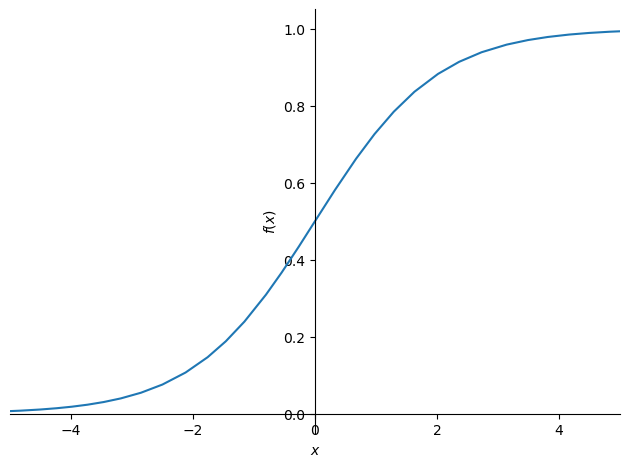

In [52]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [53]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [54]:
coeffs = train_model(30,0.2)

0.510; 0.506; 0.497; 0.485; 0.468; 0.448; 0.426; 0.403; 0.382; 0.363; 0.347; 0.333; 0.323; 0.314; 0.307; 0.300; 0.293; 0.287; 0.280; 0.274; 0.267; 0.261; 0.254; 0.248; 0.242; 0.236; 0.231; 0.227; 0.223; 0.219; 

In [55]:
acc(coeffs)

tensor(0.8315)

In [56]:
calc_preds(coeffs, )

TypeError: calc_preds() missing 1 required positional argument: 'indeps'

In [ ]:
show_coeffs()

# Submitting results to Kaggle

In [ ]:
test_df = pd.read_csv(path/"test.csv")
test_df.head(2)

In [ ]:
#Performing the same data cleaning operations on the test_df
test_df['Fare'] = test_df.Fare.fillna(0)
test_df.fillna(modes, inplace=True)
test_df['Logfare'] = np.log(test_df.Fare + 1)
test_df = pd.get_dummies( test_df, columns = ['Sex', 'Embarked', 'Pclass'], dtype= 'float')


In [ ]:
test_indep = tensor(test_df[indep_cols].values, dtype = torch.float)
vals, indices = test_indep.max(dim=0)
test_indep = test_indep/vals

In [ ]:
test_df['Survived'] = (calc_preds(coeffs, test_indep) > 0.5).int()

In [ ]:
sub_df = test_df[['PassengerId', 'Survived']]
sub_df.head(-5)

In [ ]:
sub_df.to_csv('sub.csv', index = False)

In [ ]:
!head sub.csv 

# Matrix Methods

In [ ]:
#Matrix multiplication can be done element-wise like so:
(val_indep*coeffs).sum(axis=1)

In [ ]:
#Or done using a prebuilt torch method
val_indep@coeffs

In [ ]:
#updating calc_preds to use the new method
def calc_preds(coeffs, t_indep): return torch.sigmoid(t_indep@coeffs)

In [ ]:
#updating init coeffs to produce a nx1 matrix instead of a tensor
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [ ]:
trn_dep = trn_dep[:, None] #Indexing into a second dimension creates the second dimension required
val_dep = val_dep[:, None]

In [ ]:
trn_dep.shape #Now theres a trailing dimension

In [ ]:
coeffs = train_model(30,0.2)

In [ ]:
acc(coeffs)

# A Neural Network 

1. Create hidden layers 

In [ ]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5/ n_hidden) #dividing by n_hidden ensures that gradients are roughly what they were before
    # creates 20 values for each row
    layer2 = (torch.rand(n_hidden, 1)-0.3)
    # generating a column vector of survival
    const = torch.rand(1)[0] 
    #creating a constant term
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [ ]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1) #recall relu replaces negatives with 0
    res = res@l2 + const
    return torch.sigmoid(res)

In [ ]:
def update_coeffs(coeffs, lr):
    for layer in coeffs: layer.sub_(layer.grad*lr)

In [ ]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs,lr)
    return coeffs

def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [ ]:
coeffs = train_model(lr = 2.8)

In [ ]:
acc(coeffs) #TODO: investiate why accuracy is so low - is it due to variations?

# Deep learning 

Building a deep learning model from scratch

### Investigating the mechanism behind init_coeffs()

In [ ]:
 hiddens = [10,10] #<- this is set to the size of the hidden layers you want. e.g. right now we have 2 hidden layers with 10 activations each

In [ ]:
sizes = [n_coeff] + hiddens + [1]
sizes

In [ ]:
n= len(sizes)
n

In [ ]:
layers = [(torch.rand(sizes[i], sizes[i+1]) - 0.3)/sizes[i+1]*4 for i in range(n-1)]
# Our first layer takes in the features and then each subsequent layer identifes trends across multiple features, before finally outputting a prediction
# For the current numbers, makes a 12 x 10 tensor of weights, then a 10x10, then a 10 x 1
layers

In [ ]:
consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
consts

In [ ]:
def init_coeffs():
    hiddens = [10,10] #<- this is set to the size of the hidden layers you want. e.g. right now we have 2 hidden layers with 10 activations each
    sizes = [n_coeff] + hiddens + [1] 
    n= len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1]) - 0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+ consts: l.requires_grad_()
    return layers, consts

In [ ]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers, consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l +consts[i]
        if i!= n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [ ]:
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers + consts: layer.sub_(layer.grad*lr)

In [ ]:
coeffs = train_model(lr = 1.4)

In [ ]:
acc(coeffs)